In [253]:
import numpy as np
import matplotlib.pyplot as plt

In [254]:
def g0_sampler():
    return np.random.normal(0, 1)

def f_sampler(theta):
    return np.random.normal(theta, 0.1)

def F_likelihood(theta, x):
    return np.exp(-(theta - x)**2 / (2 * 0.1**2))

In [255]:
def DP_sampler(n, alpha):
    # Sample the thetas
    thetas = []
    for i in range(n):
        u = np.random.uniform()
        if u < alpha / (alpha + i):
            thetas.append(g0_sampler())
        else:
            thetas.append(thetas[np.random.randint(0, i)])
    return thetas

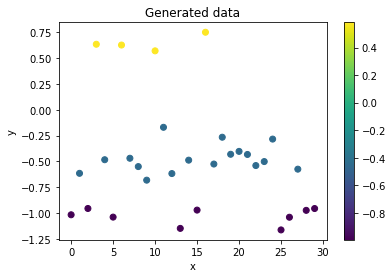

In [256]:
# Generate data
n = 30
alpha = 0.3
thetas = DP_sampler(n, alpha)
y = np.array([f_sampler(theta) for theta in thetas])

# Plot data
plt.figure()
plt.scatter(np.arange(n), y, c=thetas)
plt.title("Generated data")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()

# Algo 8

In [257]:
def algo_8(y, N, alpha, m):
    n = len(y)
    phi_table = np.zeros((N+1, n + m), dtype=float)
    c_table = np.zeros((N+1, n), dtype=int)
    c_table[0] = np.array([i + 1 for i in range(n)])

    for loop in range(N):
        c = c_table[loop].copy()
        phi = phi_table[loop].copy()
        for i in range(n):
            c_minus_i = np.concatenate((c[:i], c[i + 1:]))
            k_ = np.unique(c_minus_i).size
            if c[i] in c_minus_i:
                phi[-m:] = np.array([g0_sampler() for _ in range(m)])
            else:
                phi[-m + 1:] = np.array([g0_sampler() for _ in range(m - 1)])
            probabilities = []
            for cluster in range(1, n + m + 1):
                if cluster <= n:
                    n_occurence = np.sum(c_minus_i == cluster)
                    probabilities.append(n_occurence / (n - 1 + alpha) * F_likelihood(phi[cluster - 1], y[i]))
                else:
                    probabilities.append((alpha / m) / (n - 1 + alpha) * F_likelihood(phi[cluster - 1], y[i])) 
            probabilities = np.array(probabilities)
            probabilities_without_nan = np.nan_to_num(probabilities, nan=0)
            sum_prob_without_nan = np.sum(probabilities_without_nan)
            if sum_prob_without_nan == 0:
                c[i] = np.random.choice(np.array([i + 1 for i in range(n + m)]))
            else:
                probabilities /= sum_prob_without_nan
                c[i] = np.random.choice(np.array([i + 1 for i in range(n + m)]), p=probabilities)
        for cluster in np.unique(c):
            phi[cluster - 1] = np.mean(y[c == cluster])
        phi_table[loop + 1] = phi
        c_table[loop + 1] = c

    return c_table[-1], phi_table[-1]

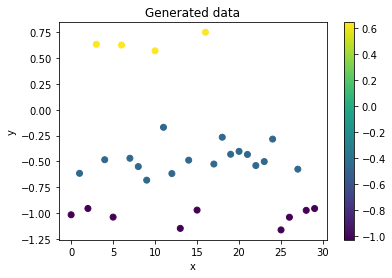

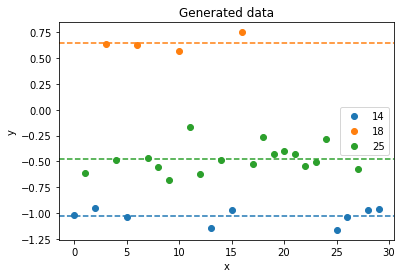

In [262]:
N = 200
alpha = 0.25
m = 5

c, phi = algo_8(y, N, alpha, m)

# plot y coloured by theta
plt.figure()
plt.scatter(np.arange(n), y, c=phi[c - 1])
plt.title("Generated data")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()

# plot y coloured by theta
plt.figure()
# define infinite list of colors
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i, cluster in enumerate(np.unique(c)):
    plt.scatter(np.arange(n)[c == cluster], y[c == cluster], label=cluster, color=COLORS[i])
    plt.axhline(phi[cluster - 1], color=COLORS[i], linestyle="--")
plt.title("Generated data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()